In [3]:
#importing the Required packages

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import string
from scipy.stats import gaussian_kde
import plotly.plotly as py
import re

In [4]:
# QUESTION 1
# -------------------------------DATA MUNGLING--------------------------------------------------------------------------------

# Loading the two data sets provided for analysis

loans_data = pd.read_csv("2012_to_2014_loans_data.csv",skip_blank_lines = True,low_memory = False)
Institutions_data = pd.read_csv("2012_to_2014_institutions_data.csv",skip_blank_lines = True)

In [5]:
# Merging the two data files. Merging is done on three variables.
# Respondant _ID, Agency_Code and As_of_Year

Merged_data = pd.merge(loans_data,Institutions_data,how = 'inner',on = ['Respondent_ID','Agency_Code','As_of_Year'])

In [6]:
# Datapoints are not in the right format. Hence, converting the variables in the object
# format to a numeric format through coercing. This ensures that all the non numeric values are converted
# to nan. However, this is not necessary if the user wants to analyze the non numeric
# values in the numeric variables

def Data_Clean(data):
    Lst = ['Census_Tract_Number','Applicant_Income_000','County_Code',
           'FFIEC_Median_Family_Income','MSA_MD','Number_of_Owner_Occupied_Units',
           'Respondent_ID','Tract_to_MSA_MD_Income_Pct']
    for i in Lst:
        data[i] =  pd.to_numeric(data[i], errors='coerce')
    return data

In [7]:
# Usecase-1
Merged_data = Data_Clean(Merged_data)

In [8]:
# Grouping the loan amount and creating a new attribute
# We can see that 75% of the data points fall below 340 and 91% of the data
# points fall under 514 (75 percentile * Inter quartile range)
# dividing it into 4 groups. Low Non conforming, Non Conforming,
# Low Conforming and High Conforming

Merged_data.Loan_Amount_000.describe()

count    1.321158e+06
mean     2.902331e+02
std      9.657792e+02
min      1.000000e+00
25%      1.530000e+02
50%      2.350000e+02
75%      3.470000e+02
max      9.962500e+04
Name: Loan_Amount_000, dtype: float64

(array([  5384.,   2236.,   2083.,   4125.,   4201.,   6015.,  10563.,
          9563.,  12621.,  15112.,  17200.,  16631.,  20241.,  21999.,
         21371.,  24846.,  25702.,  25765.,  26430.,  32251.,  30462.,
         29834.,  32638.,  30858.,  28370.,  33638.,  26704.,  31632.,
         30224.,  28408.,  26680.,  30522.,  25880.,  24090.,  27788.,
         25901.,  22992.,  21460.,  24998.,  19416.,  23496.,  19536.,
         17946.,  16913.,  19327.,  15319.,  15650.,  18626.,  12805.,
         14852.,  14924.,  14674.,  13588.,  14379.,  19356.,  14158.,
         34007.,   4030.,   4009.,   3968.,   5290.,   4993.,   5237.,
          5239.,   5126.,   4864.,   5621.,   6336.,   5106.,   4501.]),
 array([   1.        ,    8.31428571,   15.62857143,   22.94285714,
          30.25714286,   37.57142857,   44.88571429,   52.2       ,
          59.51428571,   66.82857143,   74.14285714,   81.45714286,
          88.77142857,   96.08571429,  103.4       ,  110.71428571,
         118.028

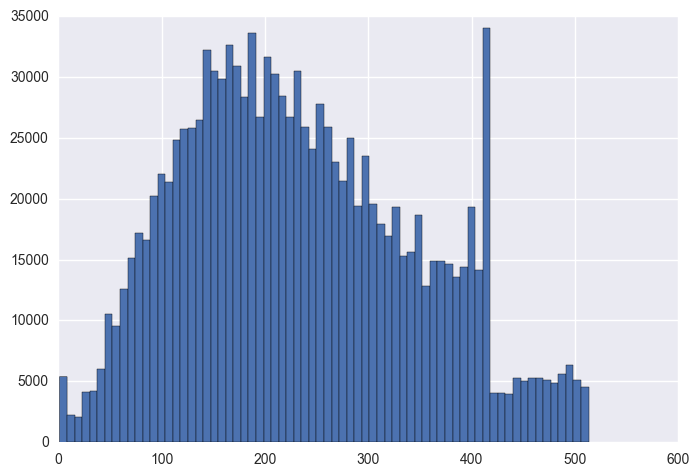

In [9]:
# Visualizing the loan amount less than $514. The values are not in 000's.
plt.hist(Merged_data.Loan_Amount_000[Merged_data.Loan_Amount_000 < 514],bins=70)

In [10]:
# Creating a new column by grouping the loan amount

Merged_data['Loan_Amount_Type'] = np.where(Merged_data['Loan_Amount_000'].isin(range(0,288)),'Low_Conforming',
                                  np.where(Merged_data['Loan_Amount_000'].isin(range(288,425)),'Mid_Conforming',
                                  np.where(Merged_data['Loan_Amount_000'].isin(range(425,637)),'High_Non_Conforming',
                                  np.where(Merged_data['Loan_Amount_000'] > 636,'Jumbo_Non_Conforming',''))))

In [11]:
# Function to perform data loading, merging and returning the data in the
# json format. Please include the path to the csv file located on the disk or change the 
# working directory.
def hmda_int():
    loans_data = pd.read_csv("2012_to_2014_loans_data.csv",skip_blank_lines = True,low_memory=False)
    Institutions_data = pd.read_csv("2012_to_2014_institutions_data.csv",skip_blank_lines = True)
    Merged_data = pd.merge(loans_data,Institutions_data,how = 'inner',on = ['Respondent_ID','Agency_Code','As_of_Year']) 
    Lst = ['Census_Tract_Number','Applicant_Income_000','County_Code',
           'FFIEC_Median_Family_Income','MSA_MD','Number_of_Owner_Occupied_Units',
           'Respondent_ID','Tract_to_MSA_MD_Income_Pct']
    for i in Lst:
        Merged_data[i] =  pd.to_numeric(Merged_data[i], errors='coerce')
    
    Merged_data['Loan_Amount_Type'] = np.where(Merged_data['Loan_Amount_000'].isin(range(0,288)),'Low_Conforming',
                                  np.where(Merged_data['Loan_Amount_000'].isin(range(288,425)),'Conforming',
                                  np.where(Merged_data['Loan_Amount_000'].isin(range(425,637)),'High_Non_Conforming',
                                  np.where(Merged_data['Loan_Amount_000'] > 636,'Jumbo_Non_Conforming',''))))    
    return Merged_data.to_json()
# Usecase 1
#DF = hmda_int()

In [17]:
# Function to filter the data with two optional parameters.
# The filter values for these parameters must be passed in the form of a list

def hmda_to_json(data,State = '',Conventional_Conforming_Flag = ''):
    if State == '':
        Temp = data[data['Conventional_Conforming_Flag'].isin(Conventional_Conforming_Flag)]
        Temp.to_json('filtered_data.json')
    elif Conventional_Conforming_Flag == '':
        Temp = data[data['State'].isin(State)]
        Temp.to_json('filtered_data.json')
    else: 
        Temp = data[((data['State'].isin(State)) & (data['Conventional_Conforming_Flag'].isin(Conventional_Conforming_Flag)))]
        Temp.to_json('filtered_data.json')
        
# Usecase 2
#hmda_to_json(Merged_data,['WV'],['Y'])    

In [77]:
# Question 2
# ------------------------------QUALITY CHECK---------------------------------------------------------------------------------

# The following function is to find the total number of data points with 
# missing,alphanumeric,special characters and digits in a particular parameter
# This code can be further improved but due execution speed issues, I have not taken it further.


def Data_Quality(data,Column_name,Stats_Re = ''):
    # Initiating two objects with speicial characters and possible null value occurances
    symbol = "~`!@#$%^&*()_-+={}[]:>;',</?*-+"
    symbol1 = ['nan','NA','na','Na','','NaN','NAN']
    # if statement to select which feature to choose
    if Stats_Re == '':
        # Converting the data points in that variable to string so that some functions
        # can run.
        data[Column_name] = data[Column_name].apply(lambda x: str(x))
        # Count number of data points that are digits
        Count_digit = [char.strip('-').isdigit() for char in data[Column_name]].count(True)
        # Count number of data points that are alpha numeric
        Count_alphanum = [bool(re.match("^(?=.*[a-zA-Z])(?=.*[0-9])",str(char))) for char in  data[Column_name]].count(True)
        # Count number of data points that have negative values      
        Count_Negative = pd.Series.tolist(pd.to_numeric(data[Column_name],errors = 'coerce') < 0).count(True)
        # Count number of data points having null values
        Count_Null = [bool(set(symbol1).intersection([char])) for char in data[Column_name]].count(True)
        # Count number of data points having special characters
        Count_specialchar = [bool(set(symbol).intersection(char)) for char in data[Column_name]].count(True)
        # Print everything out
        print 'number of data points with negative values : ' + str(Count_Negative)
        print 'number of data points with special characters : ' + str(Count_specialchar)
        print 'number of data points with alphanumeric values : ' + str(Count_alphanum)
        print 'number of data points with digits : ' + str(Count_digit)
        print 'number of data points with Null values : ' + str(Count_Null)
    elif Stats_Re != '':
        for i in data.index:
            type_issue = ''
            type_issue = type_issue+'A' if bool(re.match('[0-9]+$',str(data.loc[i,Column_name]))) else type_issue
            type_issue = type_issue+'B' if pd.to_numeric(data.loc[i,Column_name],errors = 'coerce') < 0 else type_issue
            type_issue = type_issue+'C' if bool(re.match('[a-zA-Z]+$',str(data.loc[i,Column_name]))) else type_issue
            type_issue = type_issue+'D' if bool(re.match('^(?=.*[a-zA-Z])(?=.*[0-9])',str(data.loc[i,Column_name]))) else type_issue
            type_issue = type_issue+'E' if bool(set(symbol).intersection(str(data.loc[i,Column_name]))) else type_issue
            type_issue = type_issue+'F' if bool(set(symbol1).intersection(str(data.loc[i,Column_name]))) else type_issue
            data.loc[i,'Quality_check'] = type_issue
        return data['Quality_check']

In [82]:
# The function is written in a way that it can also be used for the Respondant name
# parameter. However, the flagging feature is not optimized enough to run faster on huge
# data sets. Please use the code below to check the working of this function.

# Use case 3
#Temp_data = Data_Quality(Merged_data.loc[range(0,10000),:],'Respondent_State_TS','1')
#Data_Quality(Merged_data.loc[range(0,10000),:],'Respondent_State_TS','')

# DD = ['AA','AA1','111','-1b','-21','#aa','7$b1','nan']
# DD = pd.DataFrame(DD,columns = ['A'])
# Data_Quality(DD,Column_name='A',Stats_Re='')

number of data points with negative values : 1
number of data points with special characters : 4
number of data points with alphanumeric values : 3
number of data points with digits : 2
number of data points with Null values : 1


In [12]:
# Question 3
# -----------------------------Craft a visual data narrative----------------------------------------------------------------
   
# combining conventional_Status and Conforming_Status variables to visualize their share of
# market in Waashington DC
    
Merged_data['Conv_Conf_status'] = Merged_data['Conventional_Status'] + '_' + Merged_data['Conforming_Status']

In [14]:
# Filtering the data for the states(VA,WV,PA,DC,DE,MD) surrounding Washington DC using the below code

Data_States = Merged_data[Merged_data['Respondent_State_TS'].isin(['VA','WV','DE','DC','PA','MD'])]

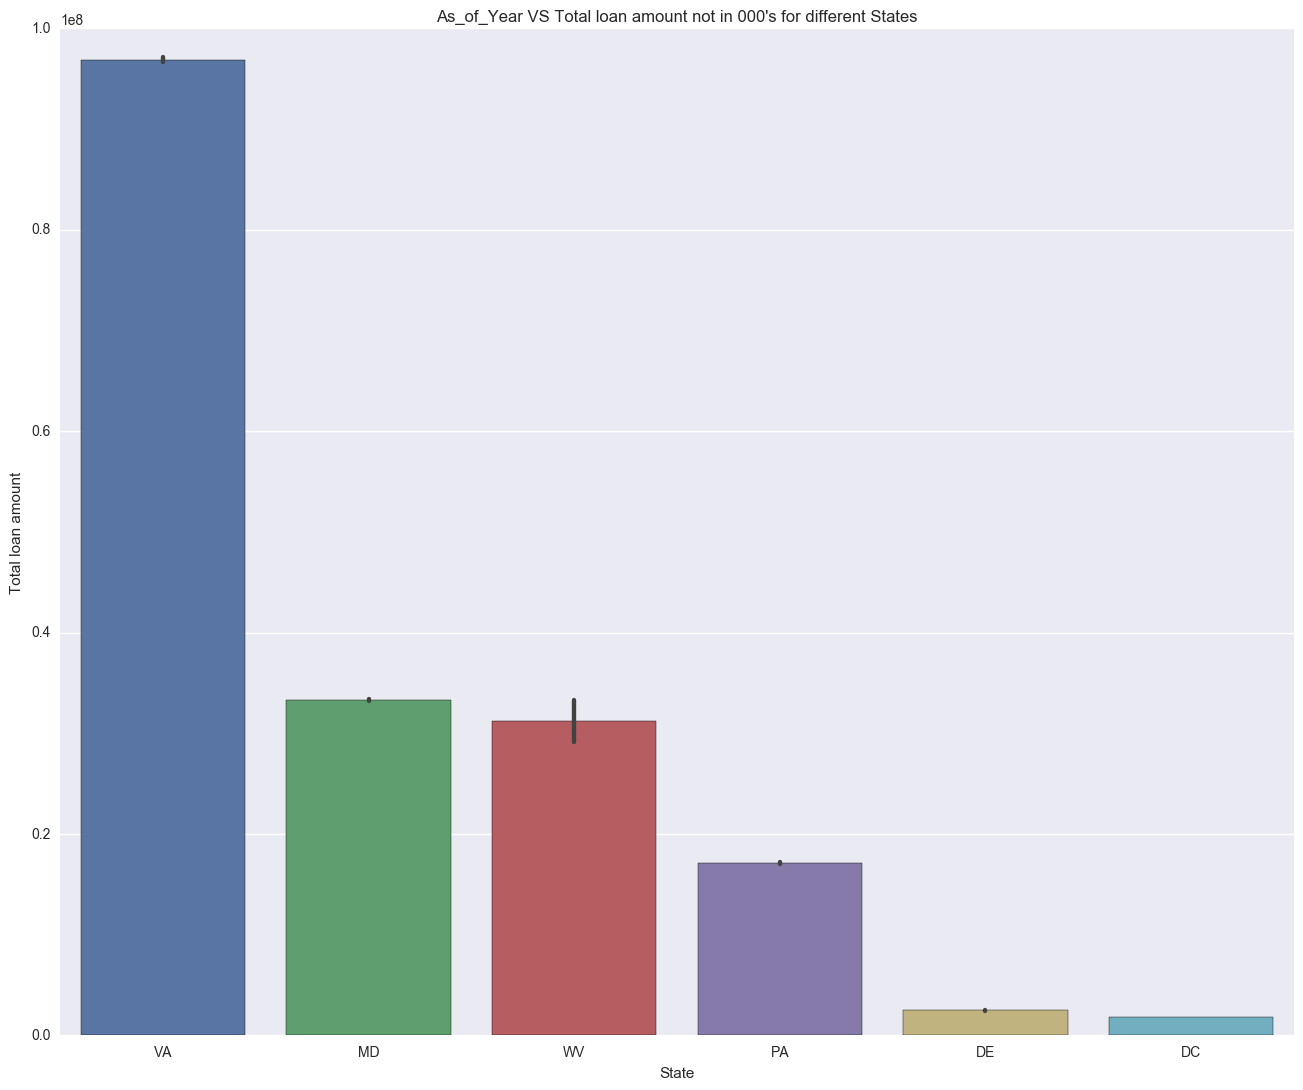

In [24]:
# A Plot between State and loan amount for the states mentioned above

# The below code is used to order that states by their market share
order_4 = Data_States.groupby('Respondent_State_TS')['Loan_Amount_000'].sum().sort_values(ascending = False).index.tolist()

Plot_4 = sns.factorplot(x="Respondent_State_TS", y="Loan_Amount_000", 
               data=Data_States,size = 11,aspect = 1.2,kind = 'bar',estimator = sum,order = order_4)    
Plot_4.set(xlabel = 'State',ylabel = "Total loan amount",
           title = "As_of_Year VS Total loan amount not in 000's for different States")

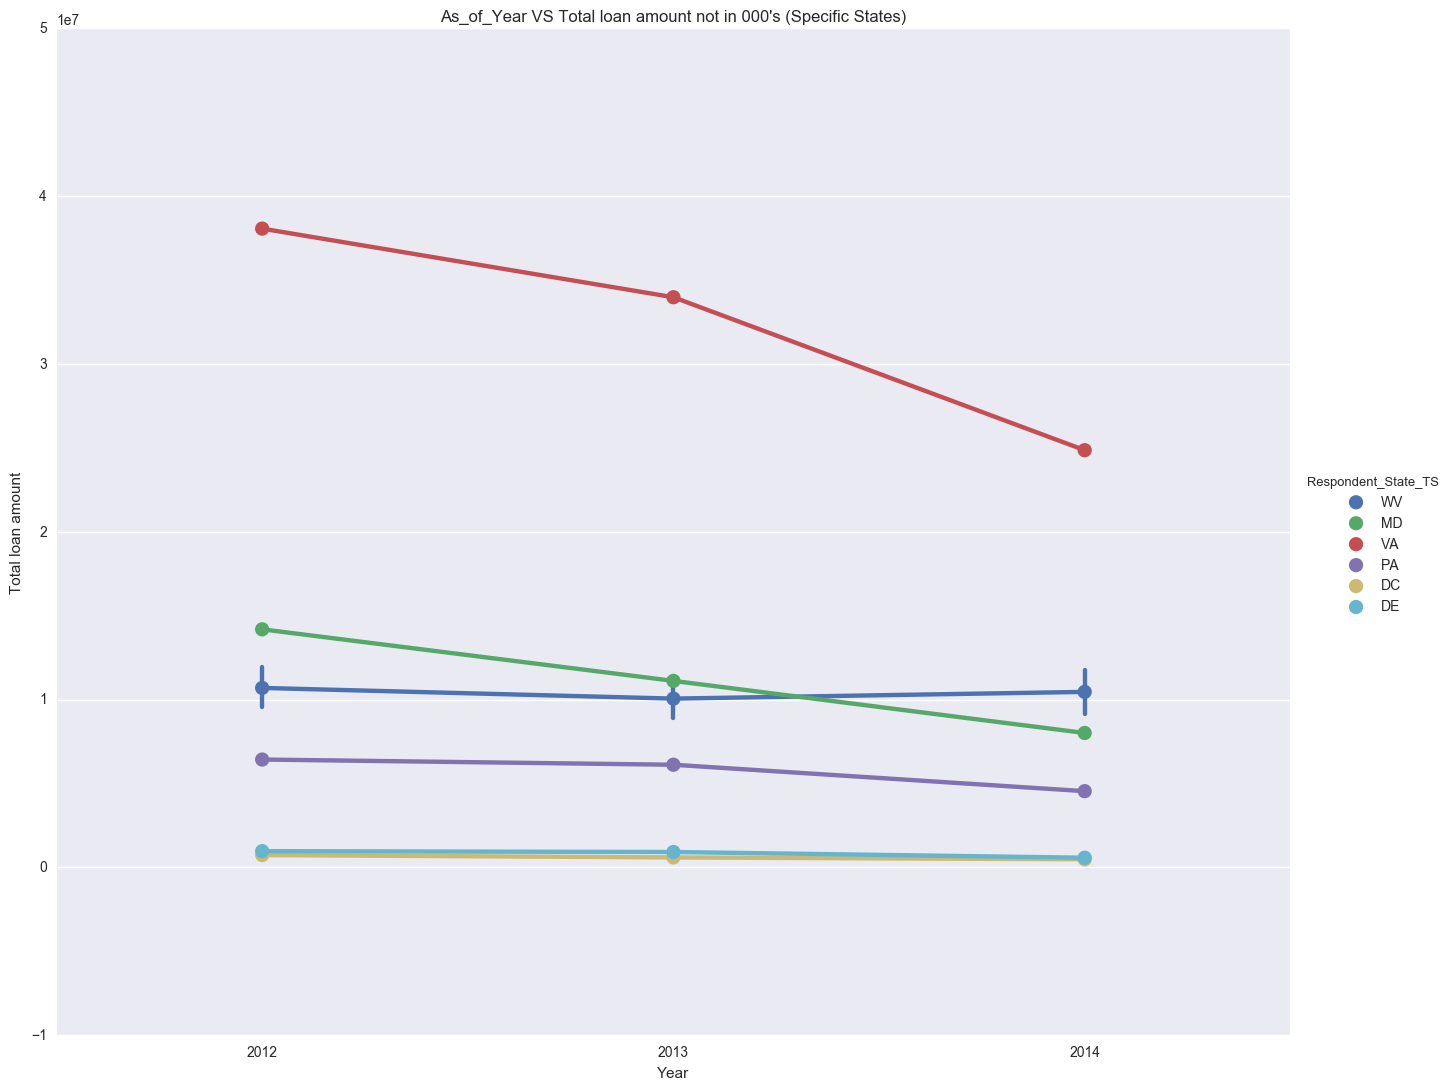

In [53]:
# Plotting between year and total loan amount for different states  

Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Respondent_State_TS',
               data=Data_States,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Total loan amount not in 000's (Specific States)")

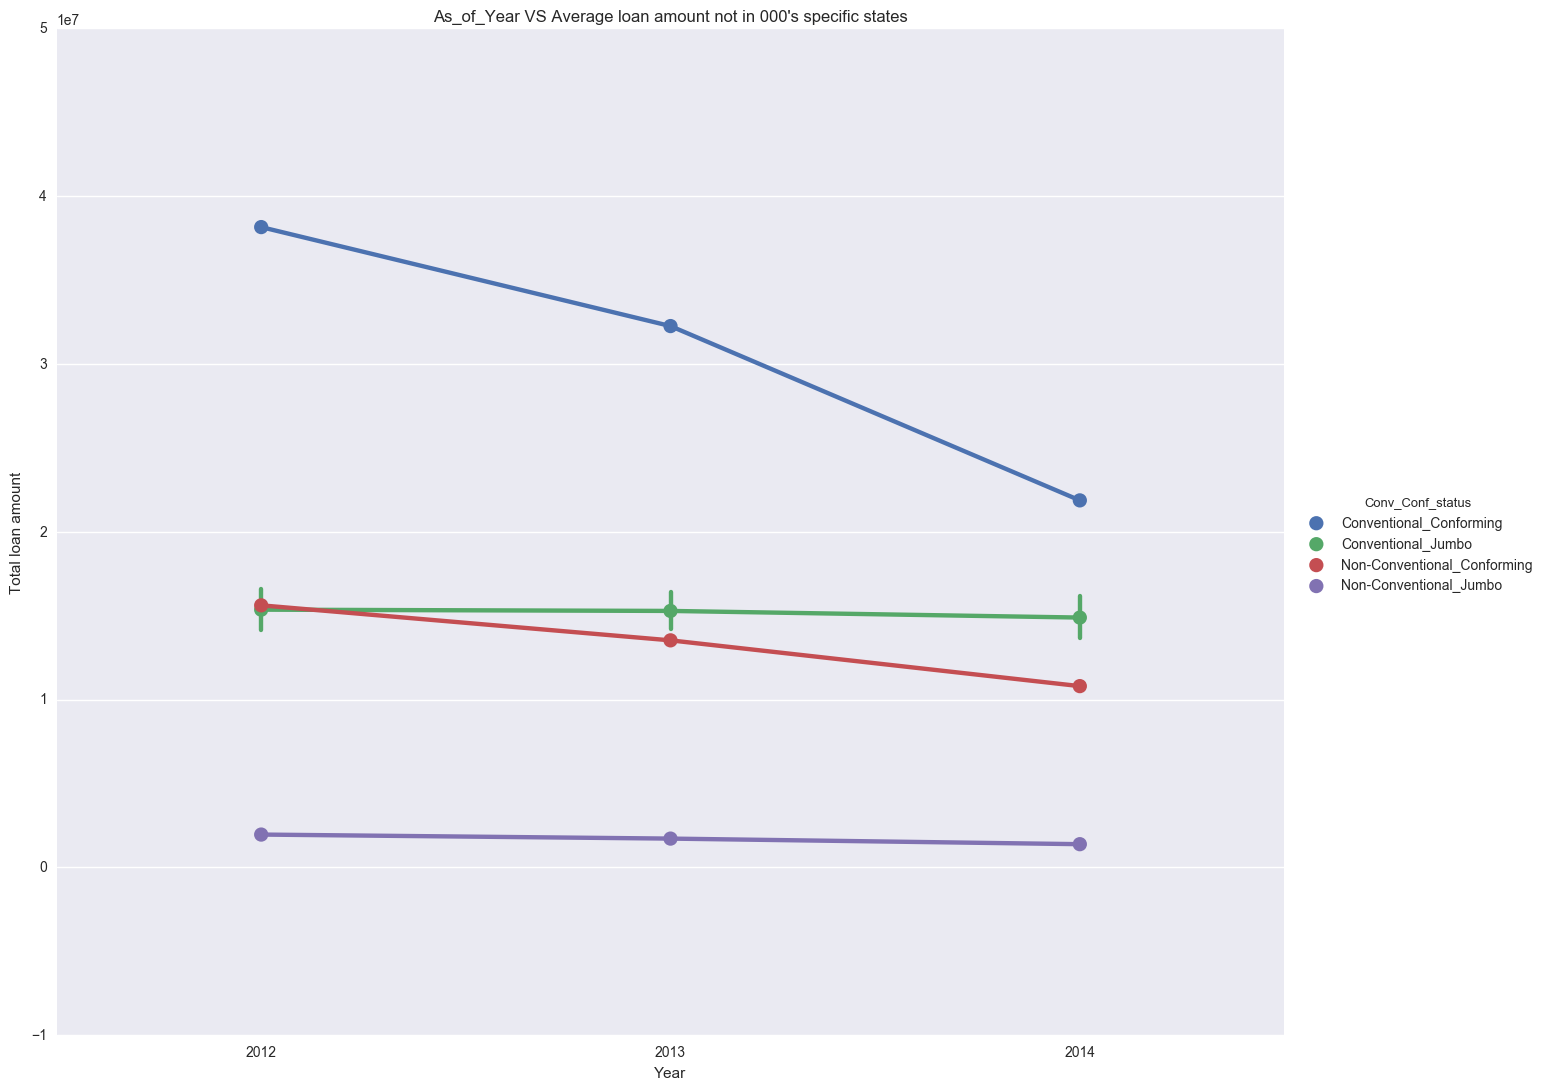

In [83]:
# Plotting different products across years considering their market share

Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Conv_Conf_status',
               data=Data_States,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Average loan amount not in 000's specific states")

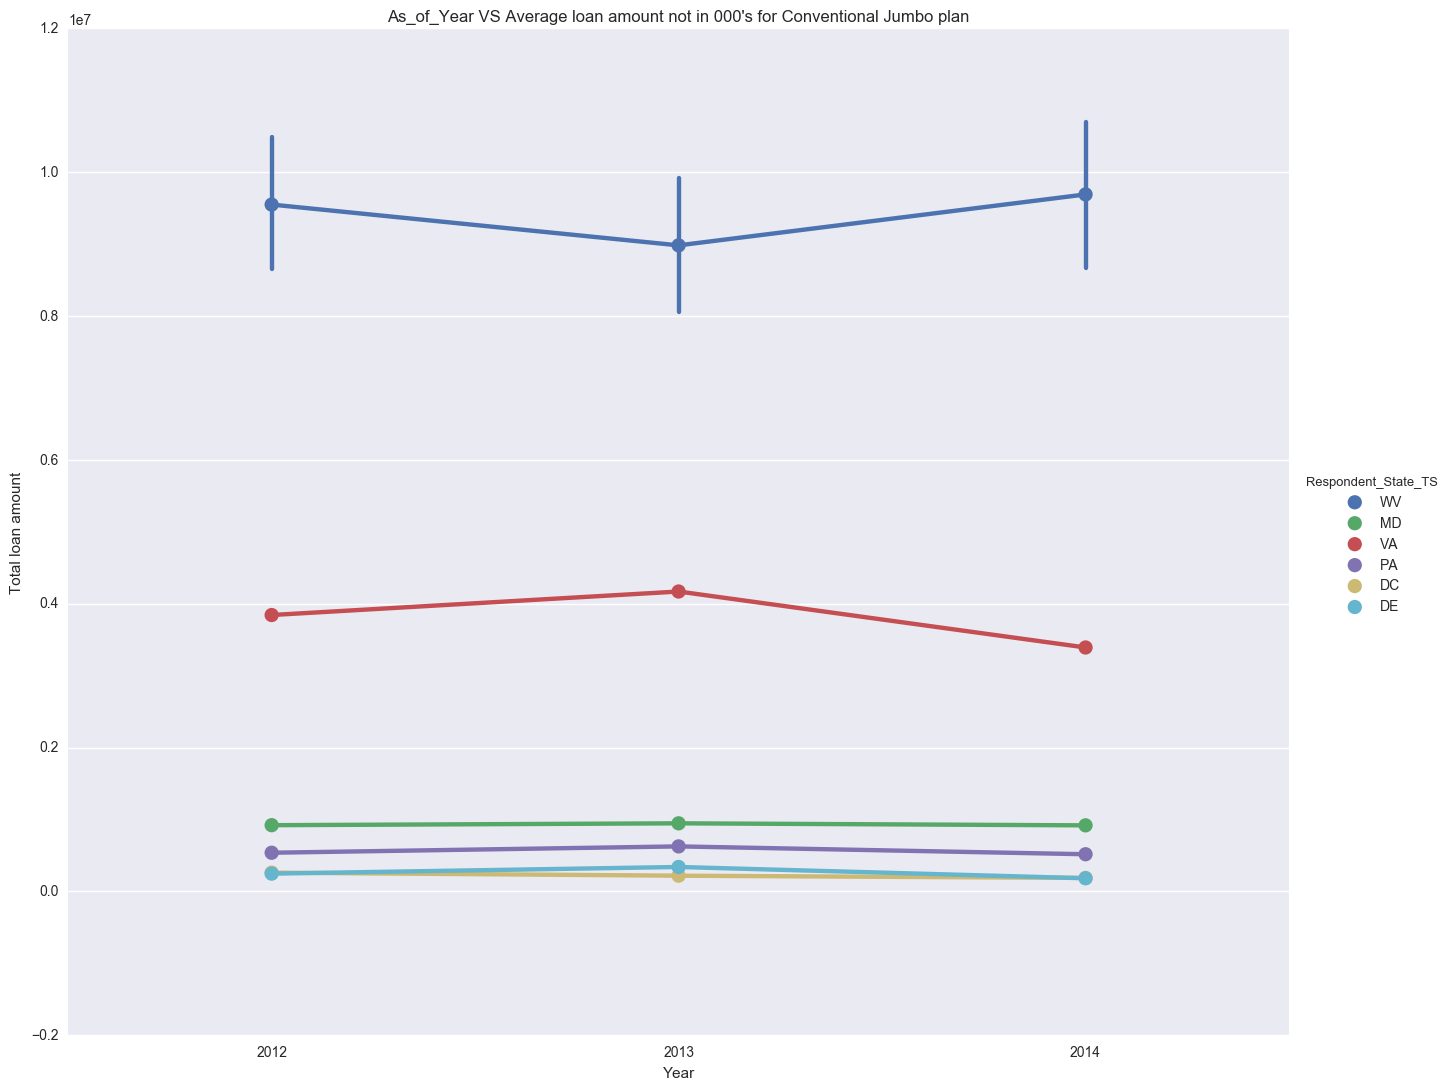

In [26]:
# Filtering data points for Conventional jumbo plan
Data_States_Convjmb = Data_States[Data_States['Conv_Conf_status'].isin(['Conventional_Jumbo'])]

# Plot this plan's trend across different years in different states
Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Respondent_State_TS',
               data=Data_States_Convjmb,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Average loan amount not in 000's for Conventional Jumbo plan")

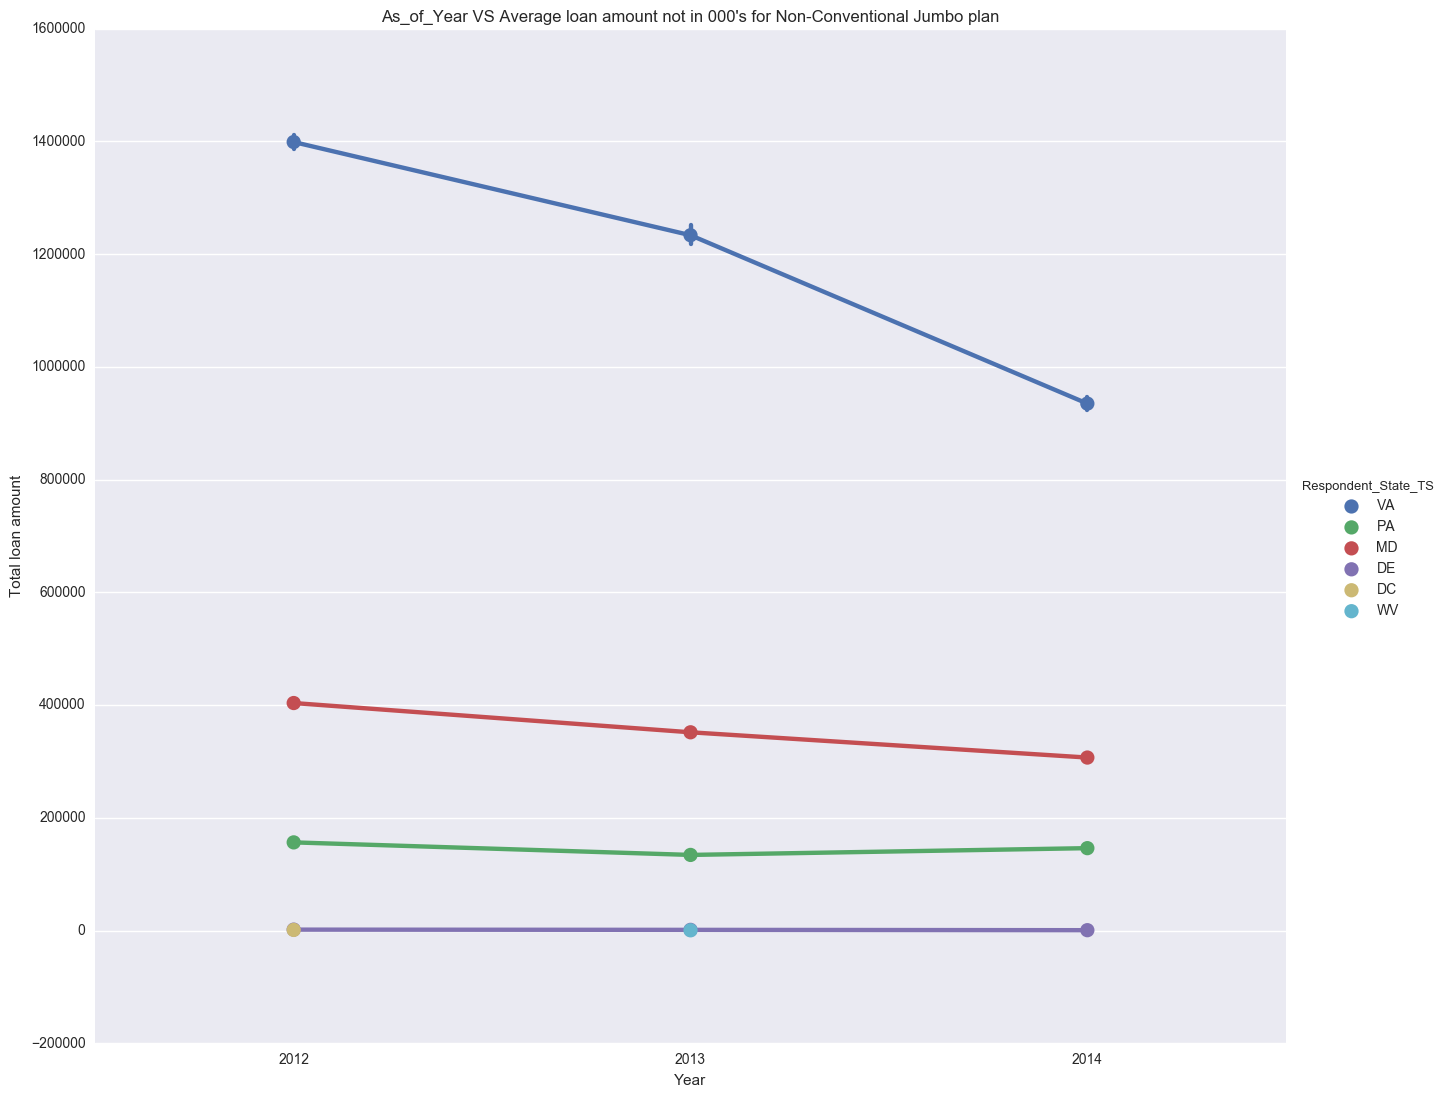

In [28]:
# Filtering data points for Non-Conventional jumbo plan
Data_States_Convjmb = Data_States[Data_States['Conv_Conf_status'].isin(['Non-Conventional_Jumbo'])]

# Plot this plan's trend across different years in different states
Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Respondent_State_TS',
               data=Data_States_Convjmb,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Average loan amount not in 000's for Non-Conventional Jumbo plan")

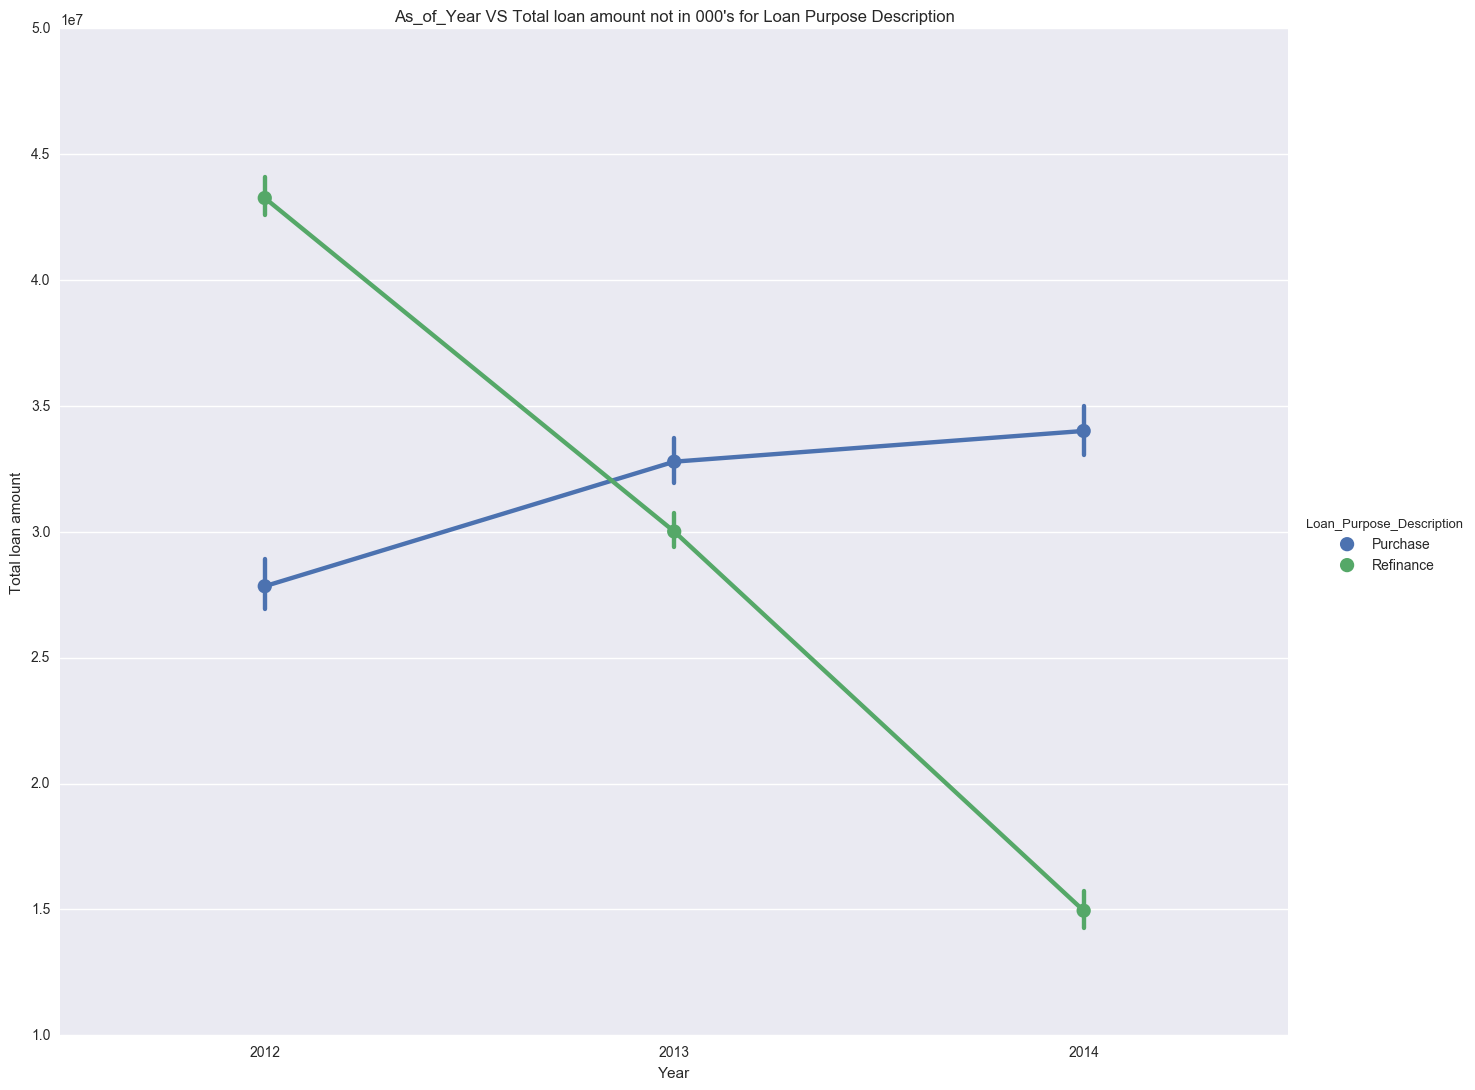

In [30]:
# Ploting loan purpose description against total loan amount 
Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Loan_Purpose_Description',
               data=Data_States,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Total loan amount not in 000's for Loan Purpose Description")

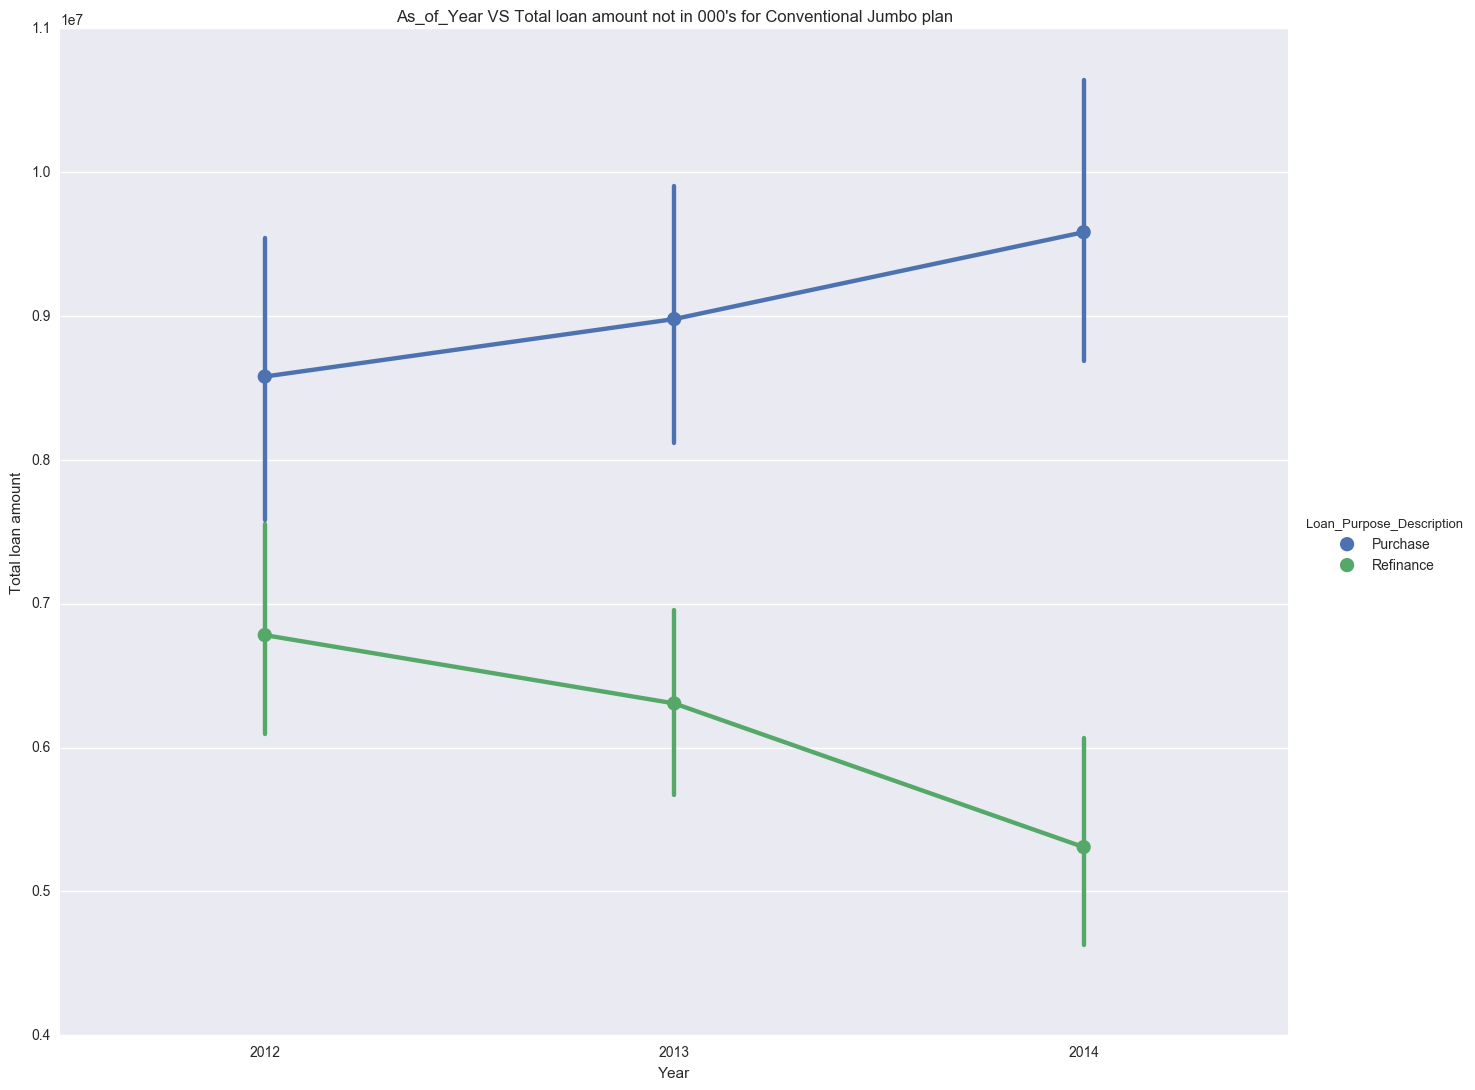

In [31]:
# Filtering data points with Conventional_Jumbo plan
Data_States_Convjmb = Data_States[Data_States['Conv_Conf_status'].isin(['Conventional_Jumbo'])]
#Ploting loan purpose description against year and total loan amount for Conventiona jumbo plans only
Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Loan_Purpose_Description',
               data=Data_States_Convjmb,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Total loan amount not in 000's for Conventional Jumbo plan")

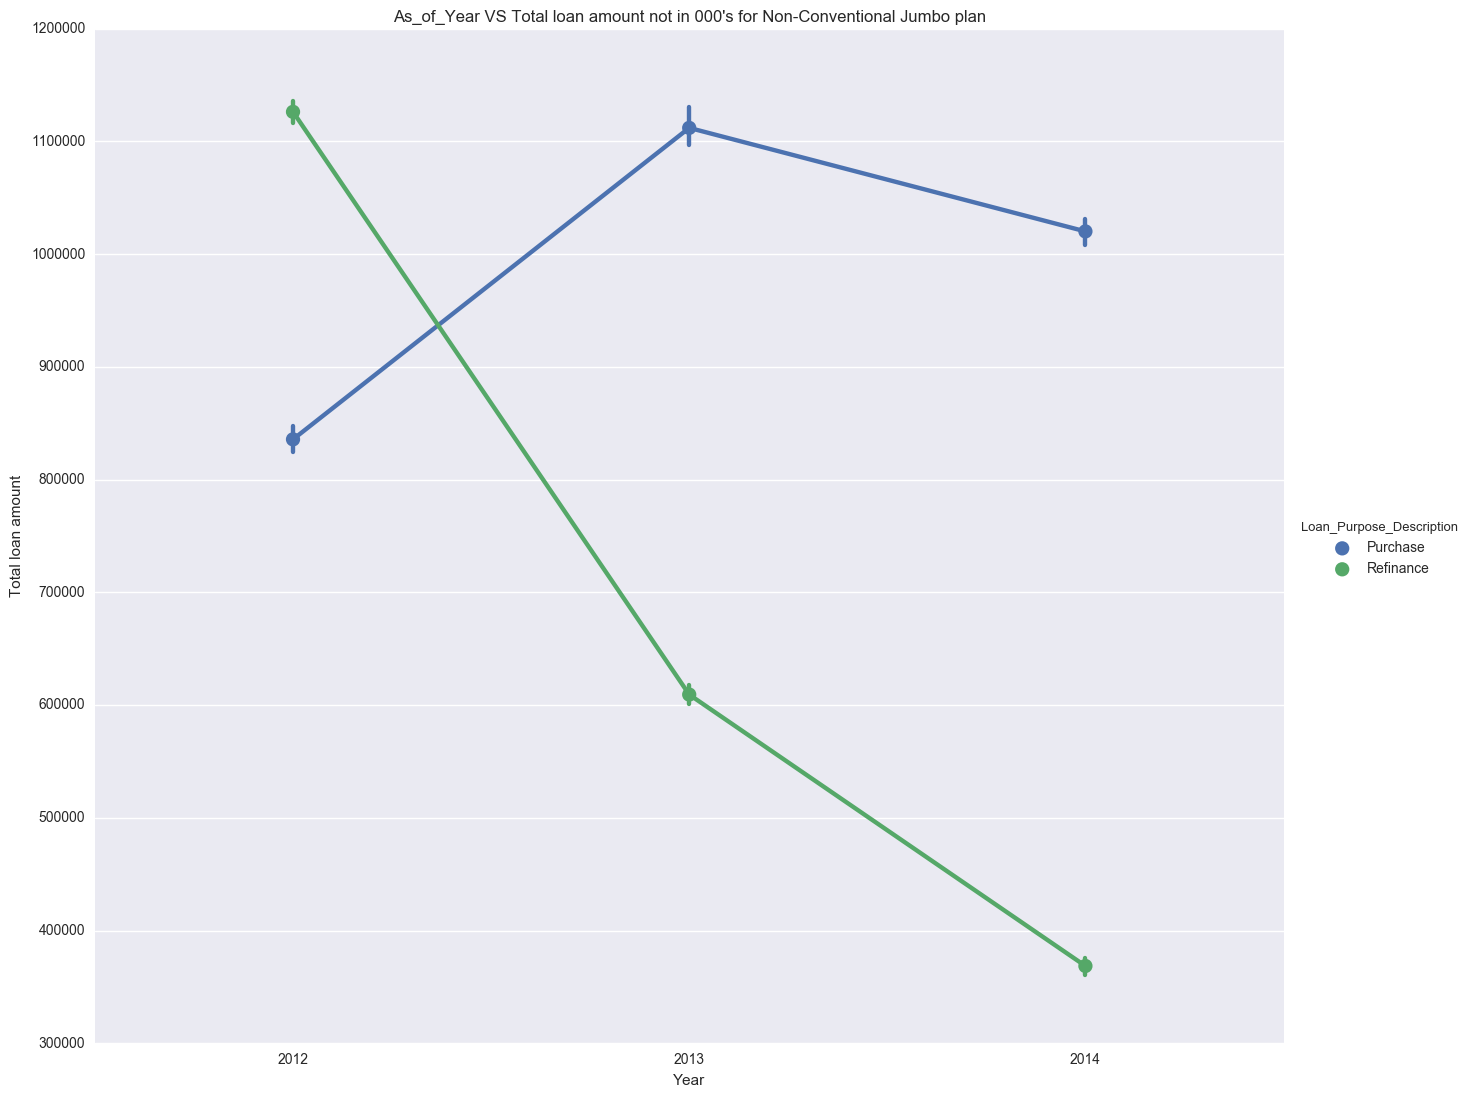

In [33]:
# Filtering data points with Non-Conventional_Jumbo plan
Data_States_Convjmb = Data_States[Data_States['Conv_Conf_status'].isin(['Non-Conventional_Jumbo'])]
#Ploting loan purpose description against year and total loan amount for Non Conventiona jumbo plans only
Plot_2 = sns.factorplot(x="As_of_Year", y="Loan_Amount_000", hue = 'Loan_Purpose_Description',
               data=Data_States_Convjmb,size = 11,aspect = 1.2,estimator = sum)
Plot_2.set(xlabel = 'Year',ylabel = "Total loan amount",
           title = "As_of_Year VS Total loan amount not in 000's for Non-Conventional Jumbo plan")

In [47]:
# Filtering out the top 5 Lenders in all the states 
Lst_ResName = Merged_data.groupby('Respondent_Name_TS').Loan_Amount_000.sum().sort_values(ascending = False).index.tolist()[:5]
Data_Temp = Merged_data[Merged_data['Respondent_Name_TS'].isin(Lst_ResName)]

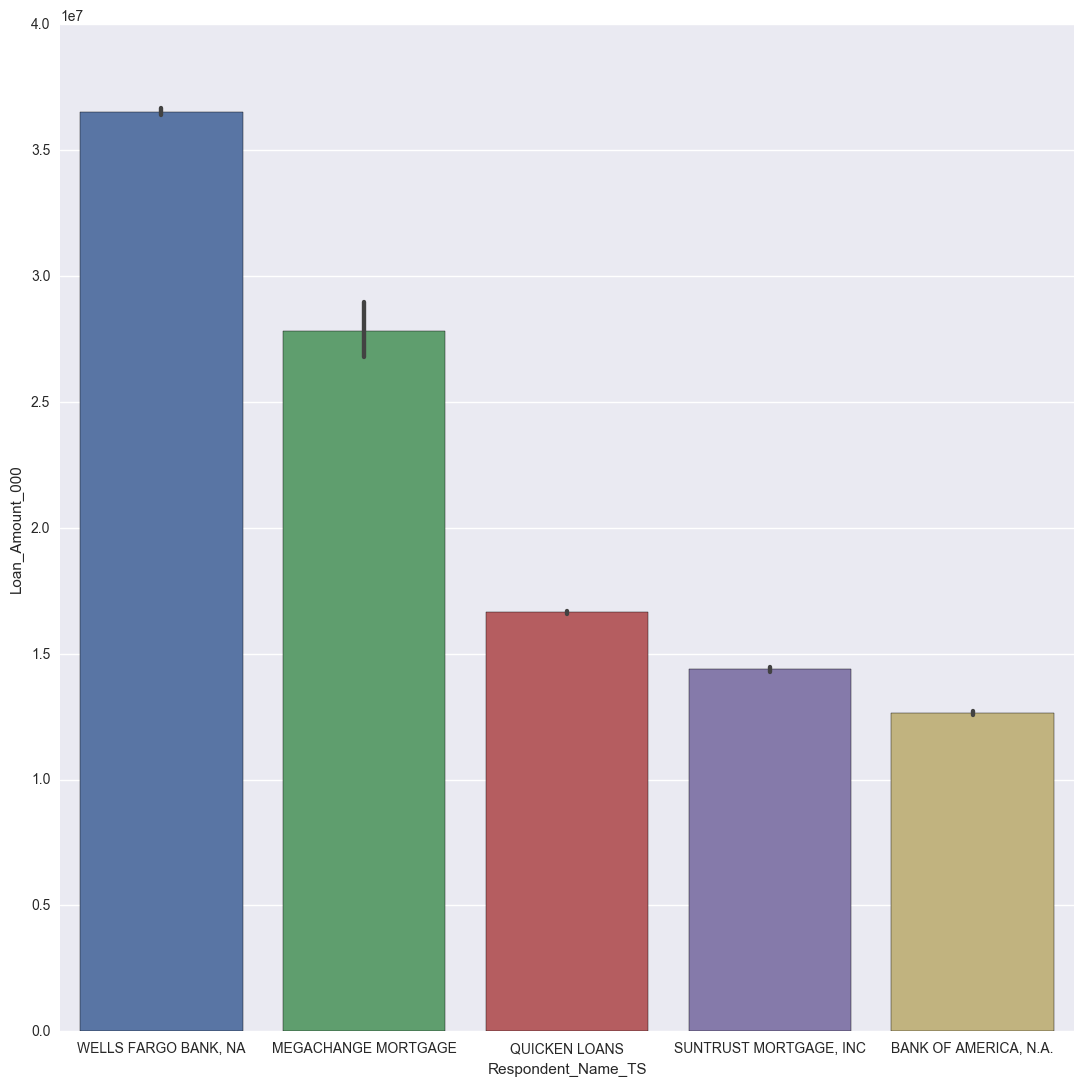

In [52]:
# Plot to visualize the Top 5 competitors in the market
sns.factorplot(x = 'Respondent_Name_TS',y="Loan_Amount_000",
               estimator = sum,kind = 'bar',data = Data_Temp,order = Lst_ResName,size = 11)

In [ ]:
# The below code exports the final data to the disk in the working directory.
Merged_data.to_csv('Merged_data.csv')